In [3]:
import numpy as np
import pandas as pd


In [4]:
cols=['user_id','item_id','rating','timestamp']

In [5]:
df=pd.read_csv('u.data',sep='\t',names=cols)

In [6]:
titles=pd.read_csv('Movie_Id_Titles')

In [7]:
r=pd.merge(df,titles,on="item_id")

In [8]:
r.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [10]:
df1=pd.DataFrame(r.groupby('title')['rating'].mean())

In [11]:
df1['number']=pd.DataFrame(r.groupby('title')['rating'].count())

In [12]:
df1.head()

,rating,number
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

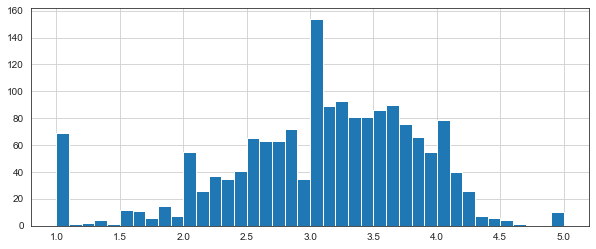

In [13]:
plt.figure(figsize=(10,4))
df1['rating'].hist(bins=40)

<AxesSubplot:>

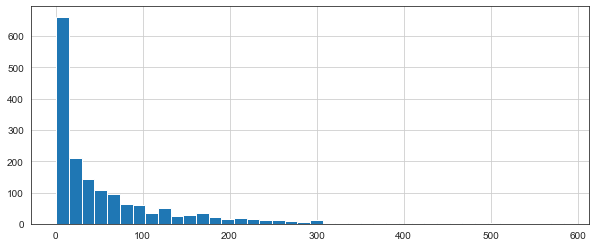

In [14]:
plt.figure(figsize=(10,4))
df1['number'].hist(bins=40)

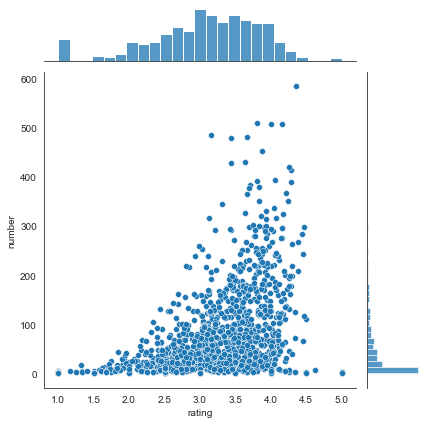

In [15]:
sns.jointplot(x='rating',y='number',data=df1)

In [16]:
mat=r.pivot_table(index='user_id',columns='title',values='rating')

In [17]:
mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1=df1.sort_values('number',ascending=False)

In [19]:
starwars=mat['Star Wars (1977)']

In [21]:
liarliar=mat['Liar Liar (1997)']

In [22]:
starwars.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [25]:
likeliar=mat.corrwith(liarliar)

In [26]:
likeliar=pd.DataFrame(likeliar,columns=['corelation'])

In [28]:
likestarwars=pd.DataFrame(likestarwars,columns=['corelation'])

In [30]:
likeliar=likeliar.dropna()

In [31]:
likestarwars=likestarwars.dropna()

In [36]:
lkst=likestarwars.sort_values('corelation',ascending=False)

In [37]:
lkliar=likeliar.sort_values('corelation',ascending=False)

In [40]:
df1.head()

,rating,number
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [44]:
lkst=lkst.join(df1['number'])

In [45]:
lkliar=lkliar.join(df1['number'])

In [52]:
lkst=lkst[lkst['number']>100].sort_values('corelation',ascending=False)

In [55]:
lkliar=lkliar[lkliar['number']>100].sort_values('corelation',ascending=False)

In [56]:
lkliar.head()

,corelation,number
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [57]:
lkst.head()

,corelation,number
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
